In [ ]:
pip install xgboost

In [1]:
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import common
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'xgboost'

In [143]:
# nba = common.get_cleaned_baseline_data('./data/cleaned_data/base_cleaned.csv')
nba = pd.read_csv('./data/cleaned_data/external_cleaned.csv')

nba = common.add_log_y_values(nba)
# nba['inflationAdjSalary_log'] = nba['salary'].apply(lambda x: np.log(x))
nba = nba.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'college','archetype','all_star','all_nba', 'position','team','inflationAdjSalary','salary'])
nba = nba.dropna()
nba = nba.loc[:, (nba != 0).any(axis=0)]
# nba = nba.drop(columns=['all_star_total'])
nba
# y=nba[:,-1]

,playerName,seasonStartYear,startYear,height,weight,MP,PTS,Age,games,games_started,...,conference_champ,mvp,mvp_rank,mvp_total,player_week_enc,player_week_total,dpoy,dpoy_rank,dpoy_total,inflationAdjSalary_log
0,Michael Jordan,1996,1985.0,78.0,198.0,3090.0,2491.0,32.0,82.0,82.0,...,1,1,1,4,2,20,0,6,0,17.771714
1,Horace Grant,1996,1988.0,82.0,215.0,2286.0,847.0,30.0,63.0,62.0,...,0,0,100000,0,0,0,0,8,0,17.064332
2,Reggie Miller,1996,1988.0,79.0,185.0,2621.0,1606.0,30.0,76.0,76.0,...,0,0,100000,0,1,2,0,100000,0,16.786229
3,Shaquille O'Neal,1996,1993.0,85.0,325.0,1946.0,1434.0,23.0,54.0,52.0,...,0,0,9,0,2,6,0,100000,0,16.737412
4,Gary Payton,1996,1991.0,76.0,180.0,3162.0,1563.0,27.0,81.0,81.0,...,1,0,6,0,0,1,1,1,1,16.689425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10461,Adreian Payne,2017,2015.0,82.0,237.0,135.0,63.0,25.0,18.0,0.0,...,0,0,100000,0,0,0,0,100000,0,11.358410
10465,James Young,2017,2015.0,78.0,215.0,220.0,68.0,21.0,29.0,0.0,...,0,0,100000,0,0,0,0,100000,0,11.358410
10471,Darrun Hilliard,2017,2016.0,78.0,205.0,381.0,127.0,23.0,39.0,1.0,...,0,0,100000,0,0,0,0,100000,0,11.358410
10481,Jonathan Gibson,2017,2017.0,74.0,185.0,231.0,106.0,29.0,17.0,0.0,...,0,0,100000,0,0,0,0,100000,0,11.317555


In [144]:
X_train, X_test, y_train, y_test = common.split_data(nba)
print(X_train.columns)

In [145]:
feature_names = nba.columns.values.tolist()
feature_names.remove('playerName')
feature_names.remove('inflationAdjSalary_log')
feature_names

['seasonStartYear',
 'startYear',
 'height',
 'weight',
 'MP',
 'PTS',
 'Age',
 'games',
 'games_started',
 'PER',
 'FTr',
 'AST',
 'STL',
 'TRB',
 'FT',
 '3P',
 'FG',
 'all_star_total',
 'all_star_enc',
 'all_nba_enc',
 'all_nba_total',
 'draft_pick',
 'champion',
 'conference_champ',
 'mvp',
 'mvp_rank',
 'mvp_total',
 'player_week_enc',
 'player_week_total',
 'dpoy',
 'dpoy_rank',
 'dpoy_total']

In [148]:
# train_dmatrix = xg.DMatrix(data = X_train, label = y_train, feature_names=feature_names)
# test_dmatrix = xg.DMatrix(data = X_test, label = y_test, feature_names=feature_names)
  
# # Parameter dictionary specifying base learner
# param = {"objective":"reg:linear"}
  
# xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
# pred = xgb_r.predict(test_dmatrix)

xgb_r = xg.XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=500, objective='reg:linear')
  
# Fitting the model
xgb_r.fit(X_train, y_train)
  
# Predict the model
pred = xgb_r.predict(X_test)
  
# RMSE Computation
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE : % f" %(rmse))

MSE = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"MSE: {MSE}, R2: {r2}")

[15:03:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  0.911811
MSE: 0.8313990906691447, R2: 0.4736413304721848


In [149]:
feature_important = xgb_r.get_booster().get_score(importance_type='weight')
feature_important
# keys = list(feature_important.keys())
# values = list(feature_important.values())

# data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
# data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

{'f0': 271.0,
 'f1': 258.0,
 'f2': 126.0,
 'f3': 233.0,
 'f4': 181.0,
 'f5': 131.0,
 'f6': 253.0,
 'f7': 222.0,
 'f8': 122.0,
 'f9': 255.0,
 'f10': 190.0,
 'f11': 137.0,
 'f12': 85.0,
 'f13': 184.0,
 'f14': 106.0,
 'f15': 69.0,
 'f16': 95.0,
 'f17': 65.0,
 'f18': 18.0,
 'f19': 6.0,
 'f20': 48.0,
 'f21': 184.0,
 'f22': 6.0,
 'f23': 9.0,
 'f25': 5.0,
 'f26': 7.0,
 'f27': 11.0,
 'f28': 55.0,
 'f30': 18.0,
 'f31': 4.0}

<AxesSubplot: >

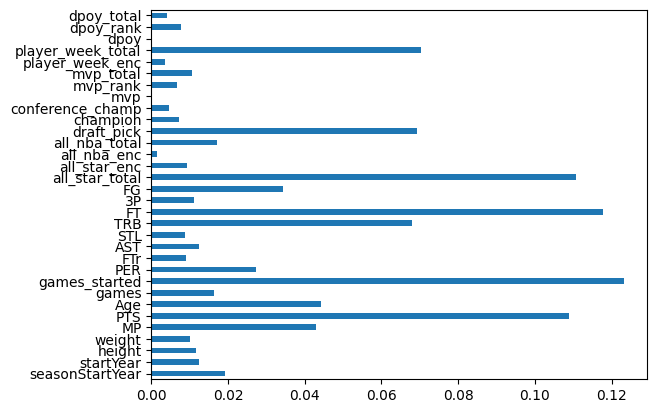

In [150]:
Predictors=['seasonStartYear','startYear','height','weight','MP','PTS','Age','games','games_started','PER','FTr','AST','STL','TRB','FT','3P','FG','all_star_total','all_star_enc','all_nba_enc','all_nba_total','draft_pick','champion','conference_champ','mvp','mvp_rank','mvp_total','player_week_enc','player_week_total','dpoy','dpoy_rank','dpoy_total']
feature_importances = pd.Series(xgb_r.feature_importances_, index=Predictors)
feature_importances.plot(kind='barh')